In [ ]:
from vertexai import rag
from vertexai.generative_models import GenerativeModel, Tool
import vertexai

/usr/local/lib/python3.12/dist-packages/google/cloud/aiplatform/models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


In [ ]:
PROJECT_ID="kevin-ai-playground" # @param {type:"string"}
REGION="asia-northeast3" # @param {type:"string"}

In [ ]:
# Initialize Vertex AI API once per session
vertexai.init(project=PROJECT_ID, location=REGION)

In [ ]:
rag.list_corpora()

ListRagCorporaPager<rag_corpora {
  name: "projects/kevin-ai-playground/locations/asia-northeast3/ragCorpora/4611686018427387904"
  display_name: "g80-manual-1024"
  create_time {
    seconds: 1762411283
    nanos: 968897000
  }
  update_time {
    seconds: 1762411283
    nanos: 968897000
  }
  corpus_status {
    state: ACTIVE
  }
  vector_db_config {
    rag_managed_db {
      knn {
      }
    }
    rag_embedding_model_config {
      vertex_prediction_endpoint {
        endpoint: "projects/kevin-ai-playground/locations/asia-northeast3/publishers/google/models/text-multilingual-embedding-002"
      }
    }
  }
}
rag_corpora {
  name: "projects/kevin-ai-playground/locations/asia-northeast3/ragCorpora/5685794529555251200"
  display_name: "g80-manual-128"
  create_time {
    seconds: 1762412154
    nanos: 25659000
  }
  update_time {
    seconds: 1762412154
    nanos: 25659000
  }
  corpus_status {
    state: ACTIVE
  }
  vector_db_config {
    rag_managed_db {
      knn {
      }
    }

In [ ]:
CORPUS_NAME="projects/kevin-ai-playground/locations/asia-northeast3/ragCorpora/5685794529555251200" # @param {type:"string"}

In [ ]:
# Get the existing RagCorpus by its full resource name
rag_corpus = rag.get_corpus(name=CORPUS_NAME)
print(f"Successfully retrieved RAG Corpus: {rag_corpus.name}")
print(f"Display Name: {rag_corpus.display_name}")

Successfully retrieved RAG Corpus: projects/kevin-ai-playground/locations/asia-northeast3/ragCorpora/5685794529555251200
Display Name: g80-manual-128


In [ ]:
rag.list_files(corpus_name=CORPUS_NAME)

ListRagFilesPager<rag_files {
  name: "projects/834471899683/locations/asia-northeast3/ragCorpora/5685794529555251200/ragFiles/5561505536606767741"
  display_name: "Geneisis G80_2026_ko_KR.pdf"
  create_time {
    seconds: 1762494756
    nanos: 162055000
  }
  update_time {
    seconds: 1762494756
    nanos: 162055000
  }
  gcs_source {
    uris: "gs://g80-manual-001/Geneisis G80_2026_ko_KR.pdf"
  }
  file_status {
    state: ACTIVE
  }
}
>

In [ ]:
# Direct context retrieval
rag_retrieval_config = rag.RagRetrievalConfig(
    top_k=20,  # Optional
    filter=rag.Filter(vector_distance_threshold=0.3),  # Optional
    ranking=rag.Ranking(
        rank_service=rag.RankService(
            model_name="gemini-2.5-flash"
        )
    )
)

In [ ]:
response = rag.retrieval_query(
    rag_resources=[
        rag.RagResource(
            rag_corpus=rag_corpus.name,
            # Optional: supply IDs from `rag.list_files()`.
            # rag_file_ids=["rag-file-1", "rag-file-2", ...],
        )
    ],
    text="앞유리에 김이 서릴 때 조치방법?",
    rag_retrieval_config=rag_retrieval_config,
)
print(response)

contexts {
  contexts {
    source_uri: "gs://g80-manual-001/Geneisis G80_2026_ko_KR.pdf"
    text: "*   **겨울철 와셔액 사용:** 겨울철에는 여름용 와셔액 대신 반드시 겨울용 와셔액을 보충하여 사용해야 합니다. 여름용 와셔액은 저온에서 결빙될 수 있어 시야 확보를 방해할 수 있습니다.\n*   **성에 신속 제거 팁:** 겨울철 앞유리 성에를 신속하게 제거하려면, 엔진 회전수를 약 2,000 rpm으로 유지하여 히터용 냉각수 온도를 빠르게 올린 후, 앞유리 서리 제거 버튼을 선택하고 온도 및 풍량을 최대로 설정하십시오."
    source_display_name: "Geneisis G80_2026_ko_KR.pdf"
    score: 0.23665627742988937
    chunk {
      text: "*   **겨울철 와셔액 사용:** 겨울철에는 여름용 와셔액 대신 반드시 겨울용 와셔액을 보충하여 사용해야 합니다. 여름용 와셔액은 저온에서 결빙될 수 있어 시야 확보를 방해할 수 있습니다.\n*   **성에 신속 제거 팁:** 겨울철 앞유리 성에를 신속하게 제거하려면, 엔진 회전수를 약 2,000 rpm으로 유지하여 히터용 냉각수 온도를 빠르게 올린 후, 앞유리 서리 제거 버튼을 선택하고 온도 및 풍량을 최대로 설정하십시오."
      page_span {
        first_page: 227
        last_page: 227
      }
    }
  }
  contexts {
    source_uri: "gs://g80-manual-001/Geneisis G80_2026_ko_KR.pdf"
    text: "*   **기본 조치:** 와이퍼 성능 저하 시 깨끗한 물과 수건으로 유리창 및 블레이드 고무 표면 청소. 발수 코팅제, 왁스, 유분 등을 주기적으로 닦고 유막 제거제 사용 권장.\n    *   **발수 코팅 제거 효과:** 왁스 또

In [ ]:
rag_retrieval_tool = Tool.from_retrieval(
    retrieval=rag.Retrieval(
        source=rag.VertexRagStore(
            rag_resources=[
                rag.RagResource(
                    rag_corpus=CORPUS_NAME,
                )
            ],
            rag_retrieval_config=rag_retrieval_config
        ),
    )
)


In [ ]:
rag_model = GenerativeModel(
    model_name="gemini-2.5-flash", tools=[rag_retrieval_tool],
)

/usr/local/lib/python3.12/dist-packages/vertexai/generative_models/_generative_models.py:433: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


In [ ]:
response = rag_model.generate_content("후방 교차 충돌방지 보조는 어떤 기능인가?")
print(response)

candidates {
  content {
    role: "model"
    parts {
      text: "후방 교차 충돌방지 보조(RCCA)는 후진 중 후측방에서 다가오는 차량을 인식하여 충돌 위험이 판단되면 운전자에게 경고(경고문, 경고음, 사이드 미러 경고등, 스티어링 휠 진동, 인포테인먼트 시스템 화면 후방 영상)하며, 충돌하지 않도록 제동을 돕는 기능입니다. 이 기능은 후측방 레이더를 사용합니다. RCCA는 Rear Cross-Traffic Collision-Avoidance Assist의 약어입니다."
    }
  }
  finish_reason: STOP
  grounding_metadata {
    grounding_chunks {
      retrieved_context {
        uri: "gs://g80-manual-001/Geneisis G80_2026_ko_KR.pdf"
        title: "Geneisis G80_2026_ko_KR.pdf"
        text: "이 기능을 사용하려면 짐칸 및 기타 장비를 제거해야 합니다.\n\n#### **2. 인식 센서**\n\n*   **내용:**\n    *   후방 교차 충돌방지 보조는 후측방 레이더를 사용합니다. 센서 정보 및 주의사항은 \'센서 정보 알아두기\'를 참조해야 합니다.\n\n#### **3. 작동 제한 사항**\n\n*   **내용:**\n    *   **후방 교차 충돌방지 보조가 정상적으로 작동하지 않을 수 있는 경우 (주의하여 운전 필요):**\n        *   나무나 풀이 무성한 곳에서 출차할 경우\n        *   노면이 젖은 도로에서 출차할 경우\n        *   상대 차량이 빠르게 또는 느리게 접근할 경우\n    *   **제동 제어가 작동하지 않을 수 있는 경우 (주의하여 운전 필요):**\n        *   도로의 요철, 파트 홀, 이음매 등으로 차량이 심하게 흔들릴 경우\n        *   눈, 고

In [ ]:
!pip install --upgrade google-cloud-aiplatform[evaluation]

In [ ]:
from vertexai import Client, types
client = Client(project=PROJECT_ID, location="us-central1")

In [ ]:
import pandas as pd

eval_dataset = pd.DataFrame({
    "prompt": [
        "앞유리에 김이 서릴 때 조치방법?.",
        "지능형 헤드램프 사용 방법?",
        "스마트폰을 등록하고 도어를 열거나 시동을 거는 방법은?",
        "후방 교차 충돌방지 보조는 어떤 기능인가?",
        "긴급 조향은 어떤 조건에서 작동하는가?"
    ],
    "reference": [
        "습기 발생 저감 \n 히터 또는 에어컨이 저온에서 작동하는 중에 실내 순환 기능을 30분 이상 유지할 경우 차량의 실내 환기를 위해 외기 유입 모드로 자동 전환합니다.\n \n 기능 설정 및 해제 방법 \n 히터 및 에어컨 스위치 기능 설정\n1. 히터 및 에어컨 작동 상태에서 바람 방향을 상체로 향하게 하십시오. \n 2. 3초 이내에 내기/외기 선택 버튼을 5번 이상 누르십시오. \n3. 내기/외기 선택 버튼 내 표시등이 6회 깜빡입니다.\n\n기능 해제\n1. 히터 및 에어컨 작동 상태에서 바람 방향을 상체(Í)로 향하게 하십시오.\n 2. 3초 이내에 내기/외기 선택 버튼(É)을 5번 이상 누르십시오.\n3. 내기/외기 선택 버튼 내 표시등이 3회 깜빡입니다.\n\n 인포테인먼트 시스템\n 시동 'ON' 상태에서 인포테인먼트 시스템의 설정 > 차량 > 공조 > 자동 환기 > 습기 발생 저감에서 기능을 선택하거나 해제할 수 있습니다",
        "지능형 헤드램프 \n 지능형 헤드램프는 밤에 운전할 때 다른 운전자에게 눈부심 등의 불편함을 주지 않고 상향등을 켤 수 있도록 도와줍니다. \n 앞유리에 장착된 전방 카메라에 마주 오는 차량 또는 앞 차량이 감지되면 자동으로 해당 상향등의 LED가 부분적으로 꺼집니다. 100 km/h 이상 주행 시 고속주행모드로 진입하여 대향차의 눈부심을 방지하기 위해 운전석 측 상향등은 전체 소등이 이루어지며, 동승석 측의 상향등만으로 지능형 헤드램프가구현됩니다. \n\n 지능형 헤드램프 설정 \n 시동 'ON' 상태에서 인포테인먼트 시스템의 설정 > 차량 > 라이트 > 지능형 헤드램프에서 원하는 속도를 선택하면 기능이 켜집니다.",
        "디지털 키 (스마트폰) 사용 안내\n\n### 📱 스마트폰 사전 설정하기\n\n필수 사항: 디지털 키(스마트폰)를 사용하려면 우선 MY GENESIS 앱 설치, 회원 및 서비스 가입이 필요합니다.\n\n스마트폰 등록하기\n1. 스마트 키를 이용하여 차량 전원을 'ON' 한 후, 스마트 키 1개를 차량 실내에 두십시오.\n2. 기어를 'P'(주차)에 두고, 스마트폰에서 MY GENESIS 앱의 마이 메뉴 > 차량 관리 > 디지털 키 관리 > 등록을 누른 후, 화면 안내에 따라 등록하십시오.\n* UWB 미지원 스마트폰의 경우: 스마트폰의 NFC 안테나를 실내 인증 패드(무선 충전 패드)[A]의 중심에 맞춰 올려놓으십시오.\n* UWB 지원 스마트폰의 경우: 실내 인증 패드(무선 충전 패드)[A]에 스마트폰을 두지 않아도 차량 내에 스마트폰을 휴대하고 있으면 무선으로 디지털 키 등록이 가능합니다.\n* 등록이 완료되면 차량의 인포테인먼트 시스템 화면에 등록 완료 상태가 표시됩니다.\n\n### 🚗 디지털 키 (스마트폰) 사용하기\n\n터치 제어 (도어 잠금/잠금 해제)\n스마트폰을 차량 도어 핸들에 터치하여 도어 잠금/잠금 해제가 가능합니다.\n\n차량 시동\n* UWB 미지원 스마트폰의 경우: 디지털 키(스마트폰)를 실내 인증 패드(무선 충전 패드) 중앙에 올린 상태에서 브레이크 페달을 밟고 시동 버튼을 누르십시오. 시동을 건 후에는 디지털 키(스마트폰)를 실내 인증 패드에서 분리해도 됩니다.\n* UWB 지원 스마트폰의 경우: 스마트폰을 차량 실내에 휴대한 상태에서 브레이크 페달을 밟고 시동 버튼을 누르십시오.\n\n원격 시동\n* 원격으로 시동을 걸려면 스마트폰 제조사에서 제공하는 앱을 사용하여 도어 잠금 버튼으로 차량을 잠그고, 4초 이내에 원격 시동 버튼을 누르십시오.\n* 시동이 걸리고 비상 경고등이 깜빡입니다.\n* 시동을 끄려면 원격 시동 버튼을 다시 누르십시오.\n* 참고: 기본적인 차량 버튼 시동 방법은 6장 내 '시동 버튼'을 참고하십시오.",
        "후방 교차 충돌방지 보조 (RCCA) 안내\n\n기능 설명: 후진 중 후측방에서 다가오는 차량을 인식하여 충돌 위험이 판단되면 경고문과 경고음을 통해 알려주고 충돌하지 않도록 제동을 도와줍니다.\n\n### ⚙️ 후방 교차 충돌방지 보조 설정\n\n후방 교차 안전 켜기\n* 시동 'ON' 상태에서 인포테인먼트 시스템의 설정 > 차량 > 운전자 보조 > 주차 안전 > 후방 교차 안전을 차례로 선택하십시오. 후방 교차 충돌방지 보조가 켜집니다.\n\n경고 방식 설정\n* 시동 'ON' 상태에서 인포테인먼트 시스템의 설정 > 차량 > 운전자 보조 > 경고 방식을 차례로 선택하십시오.\n* 경고 음량: 경고 음량을 조절합니다.\n* 핸들 진동\n\n### 🚦 후방 교차 충돌방지 보조 작동\n\n1. 충돌 경고\n\n* 알림 방식: 사이드 미러(실외 미러) 경고등, 경고문, 경고음, 스티어링 휠 진동을 통해 알립니다. 인포테인먼트 시스템 화면의 후방 영상에도 경고가 표시됩니다.\n* 작동 조건 (모두 만족 시):\n * 'R'(후진)인 상태에서 8 km/h 이하로 주행 중\n * 후측방 차량과의 거리가 약 25 m 이내\n * 후측방 차량의 속도가 5 km/h 이상\n\n2. 긴급 제동\n\n* 알림 방식: 사이드 미러(실외 미러) 경고등, 경고문, 경고음, 스티어링 휠 진동을 통해 긴급 제동을 알립니다. 인포테인먼트 시스템 화면의 후방 영상에도 경고가 표시됩니다.\n* 제어: 긴급 제동이 작동하면 후측방에서 접근하는 차량과의 충돌을 방지하기 위해 제동 제어를 도와줍니다.\n* 작동 조건:\n * 'R'(후진) 상태에서 8 km/h 이하로 주행 중\n * 후측방 차량과의 거리가 1.5 m 이내\n * 후측방 차량의 속도가 5 km/h 이상",
        "🛡️ 회피 조향 보조 기능\n\n기능 설명: 회피 조향 보조 기능은 전방 충돌 위험 시 운전자의 조향을 돕거나, 스스로 조향 제어를 작동하여 충돌을 피할 수 있도록 도와줍니다.\n\n### ⚠️ 긴급 조향 (운전자 조향 보조)\n\n* 알림 방식: 조향 안전 경고등(P)의 깜빡임 및 경고문, 경고음, 스티어링 휠 진동을 통해 긴급 조향을 알립니다.\n* 제어: 전방의 차량, 보행자, 자전거 탑승자 및 이륜차와 충돌 위험이 있는 경우, 운전자가 충돌을 피하기 위해 스티어링 휠을 조작하면 조향을 도와줍니다.\n* 작동 조건:\n * 자차 속도: 약 40-85 km/h\n\n### ⚙️ 긴급 조향 (회피 조향 보조)\n\n* 알림 방식: 조향 안전 경고등(P)의 깜빡임 및 경고문, 경고음, 스티어링 휠 진동을 통해 긴급 조향을 알립니다.\n* 제어: 전방의 보행자, 자전거 탑승자 및 이륜차와 충돌 위험이 높고 긴급 제동이 작동할 수 있는 속도를 초과한 경우, 주행 중인 차로에 피할 수 있는 공간이 있으면 조향 제어가 작동하여 충돌을 피할 수 있도록 도와줍니다.\n* 작동 조건:\n * 자차 속도: 약 65-75 km/h",
    ],
    "response": [
        "",
        "",
        "",
        "",
        "",
    ]
})

In [ ]:
# prompt: eval_dataset 의 prompt 배열을 하나씩 가져와서 rag_model.generate_content 를 호출하여 Gemini 의 응답을 가져오고 응답 중에서 text 를 가져와서 eval_dataset 의 response 컬럼으로 넣어줘.

for i in range(len(eval_dataset)):
  response = rag_model.generate_content(eval_dataset["prompt"][i])
  #eval_dataset["response"][i] = response.text
  eval_dataset.loc[i, "response"] = response.text


In [ ]:
print(eval_dataset["response"])

0    앞유리에 김이 서릴 때 다음과 같이 조치할 수 있습니다.\n\n*   **자동 김서...
1    제네시스 G80 지능형 헤드램프 사용 방법은 다음과 같습니다.\n\n1.  **작동...
2    스마트폰을 차량에 등록하려면, 공유 사용자의 디지털 키(스마트폰)는 문 잠금/해제를...
3    후방 교차 충돌방지 보조(RCCA)는 후진 중 후측방에서 다가오는 차량을 인식하여 ...
4    긴급 조향 기능은 상황에 따라 다음과 같은 조건에서 작동합니다.\n\n*   **후...
Name: response, dtype: object


[API Reference](https://docs.cloud.google.com/vertex-ai/generative-ai/docs/model-reference/evaluation?hl=ko#parameter-list)

[Metric Template](https://docs.cloud.google.com/vertex-ai/generative-ai/docs/models/metrics-templates#user-inputs)

[Configure Judge Model](https://docs.cloud.google.com/vertex-ai/generative-ai/docs/models/configure-judge-model)

In [ ]:
eval_result = client.evals.evaluate(
    dataset=eval_dataset,

    metrics=[
        types.PrebuiltMetric.GENERAL_QUALITY,
        types.RubricMetric.FLUENCY,
        types.RubricMetric.TEXT_QUALITY
        #types.RubricMetric.QUESTION_ANSWERING_QUALITY,

        #types.Metric(name='bleu'),
        #types.Metric(name='rouge_l'),
        #types.Metric(name='exact_match'),


    ]
)
eval_result.show()

Computing Metrics for Evaluation Dataset: 100%|██████████| 15/15 [00:41<00:00,  2.77s/it]


In [ ]:
print(eval_result)

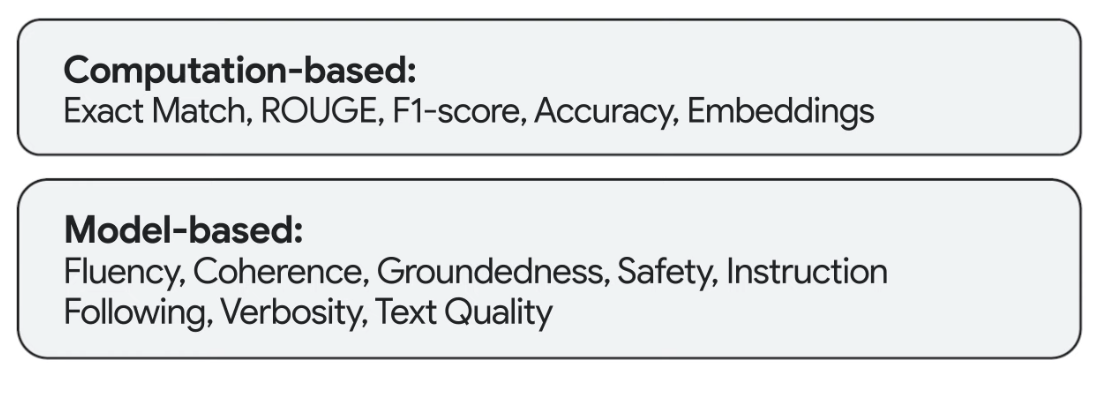
